### Business Understanding

### Data Understanding

#### data collection
#### data description

In [187]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
data = pd.read_csv('dataset.csv')
# overall information
print(data.shape)
print(data.info())

(17379, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       13411 non-null float64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          16879 non-null float64
atemp         16655 non-null float64
hum           16664 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(5), int64(11), object(1)
memory usage: 2.3+ MB
None


#### data exploration

In [188]:
# correlations
corr = data.corr()
influnce = abs(corr['cnt']).sort_values(ascending=False)
print(influnce)

cnt           1.000000
registered    0.972151
casual        0.694564
atemp         0.406315
temp          0.399432
hr            0.394071
hum           0.316514
instant       0.303196
yr            0.250495
season        0.178056
weathersit    0.142426
mnth          0.120638
windspeed     0.093234
holiday       0.030927
workingday    0.030284
weekday       0.026900
Name: cnt, dtype: float64


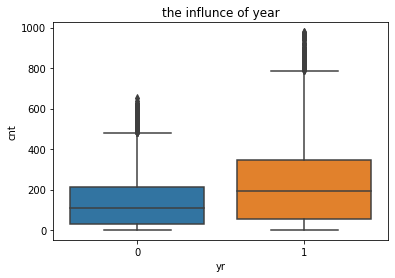

In [19]:
sn.boxplot(data['yr'], data['cnt'])
plt.title('the influnce of year')
plt.savefig("the influnce of year.jpg")

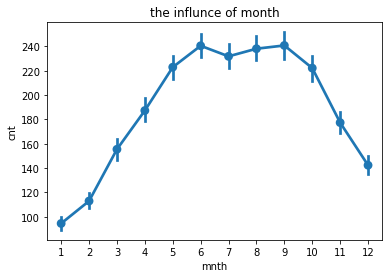

In [20]:
sn.pointplot(data['mnth'], data['cnt'])
plt.title('the influnce of month')
plt.savefig("the influnce of month.jpg")

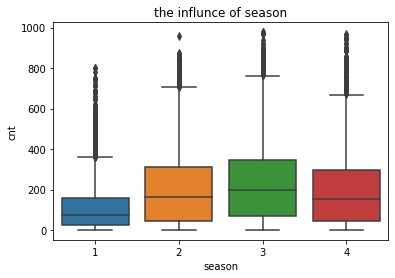

In [21]:
sn.boxplot(data['season'], data['cnt'])
plt.title('the influnce of season')
plt.savefig("the influnce of season.jpg")

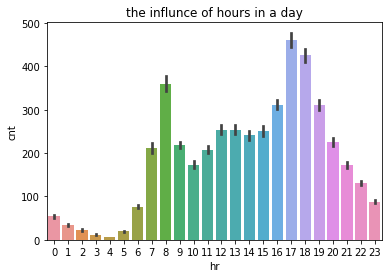

In [22]:
sn.barplot(data['hr'], data['cnt'])
plt.title('the influnce of hours in a day')
plt.savefig("the influnce of hours in a day.jpg")

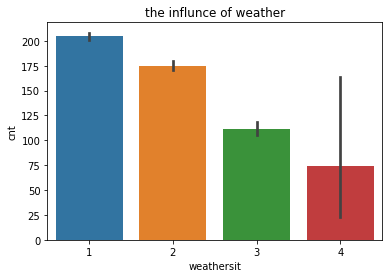

In [18]:
sn.barplot(data['weathersit'], data['cnt'])
plt.title('the influnce of weather')
plt.savefig("the influnce of weather.jpg")

### Data Preparation

#### select the data

In [189]:
data = data.drop(['dteday', 'registered', 'casual', 'season'], axis=1)
print(data.head())

   instant  yr  mnth  hr  holiday  weekday  workingday  weathersit  temp  \
0      NaN   0     1   0        0        6           0           1  0.24   
1      2.0   0     1   1        0        6           0           1  0.22   
2      3.0   0     1   2        0        6           0           1  0.22   
3      4.0   0     1   3        0        6           0           1  0.24   
4      5.0   0     1   4        0        6           0           1  0.24   

    atemp   hum  windspeed  cnt  
0  0.2879  0.81        0.0   16  
1     NaN  0.80        0.0   40  
2  0.2727   NaN        0.0   32  
3  0.2879  0.75        0.0   13  
4  0.2879  0.75        0.0    1  


#### clean the data
#### construct the data

In [190]:
data = data.drop(['instant'], axis=1)
data['temp'] = data['temp'].fillna(data['temp'].median())
data['atemp'] = data['atemp'].fillna(data['atemp'].median())
data['hum'] = data['hum'].fillna(data['hum'].median())
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
cnt           17379 non-null int64
dtypes: float64(4), int64(8)
memory usage: 1.6 MB
None


#### format the data

In [191]:
data.columns = ['year', 'month', 'hour', 'holiday', 'weekday', 'workingday',
               'weather', 'temp', 'apparent_temp', 'humidity', 'windspeed', 'count']
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
year             17379 non-null int64
month            17379 non-null int64
hour             17379 non-null int64
holiday          17379 non-null int64
weekday          17379 non-null int64
workingday       17379 non-null int64
weather          17379 non-null int64
temp             17379 non-null float64
apparent_temp    17379 non-null float64
humidity         17379 non-null float64
windspeed        17379 non-null float64
count            17379 non-null int64
dtypes: float64(4), int64(8)
memory usage: 1.6 MB
None


### Data Transformation

#### reduce the data

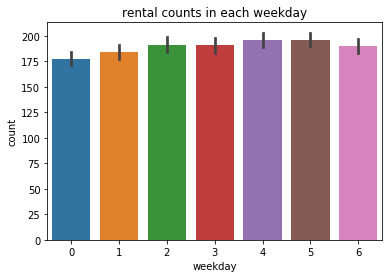

In [43]:
sn.barplot(data['weekday'], data['count'])
plt.title('rental counts in each weekday')
plt.savefig("rental counts in each weekday.jpg")

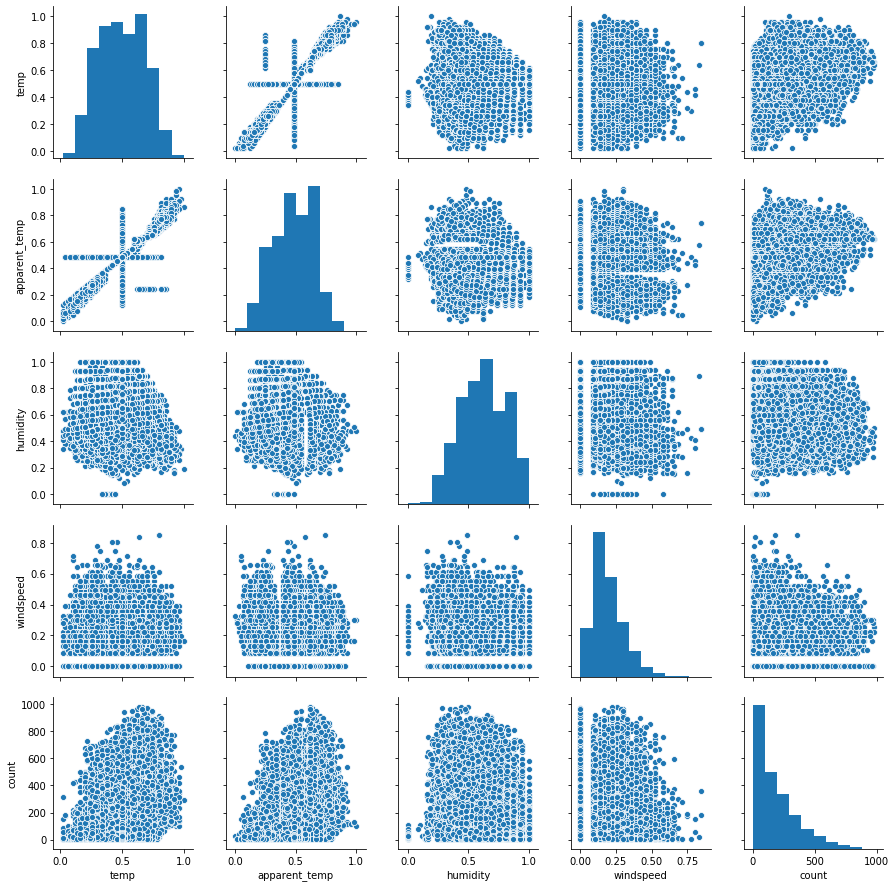

In [151]:
cols = ['temp', 'apparent_temp', 'humidity', 'windspeed', 'count']
sn.pairplot(data[cols])
plt.savefig("the influnce of weather attributes.jpg")

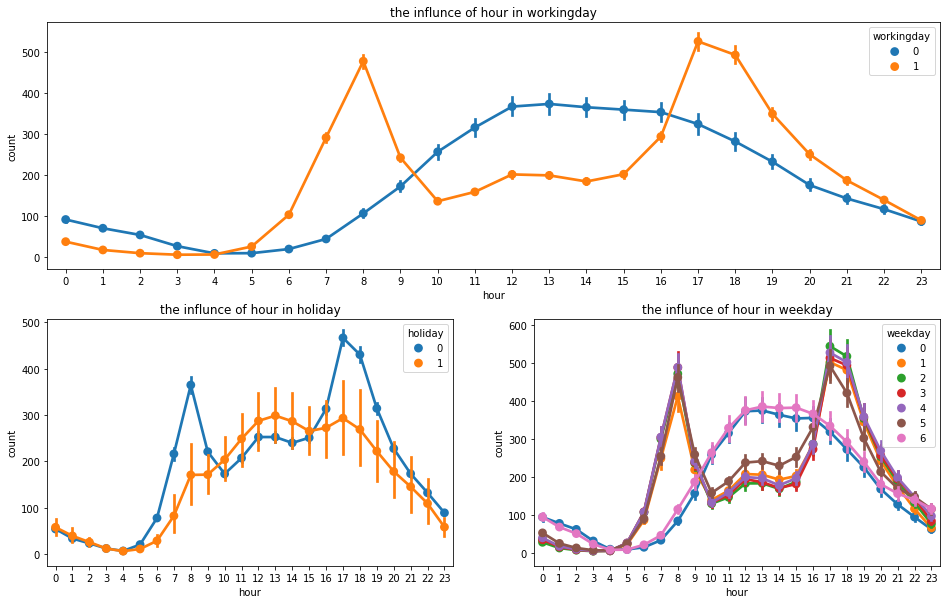

In [192]:
axes = plt.subplots(2, 1, figsize = (16,10))
ax1 = plt.subplot(2, 1, 1)
sn.pointplot(data['hour'], data['count'], hue=data['workingday'], ax=ax1)
ax1.set_title('the influnce of hour in workingday')
ax2 = plt.subplot(2, 2, 3)
sn.pointplot(data['hour'], data['count'], hue=data['holiday'], ax=ax2)
ax2.set_title('the influnce of hour in holiday')
ax3 = plt.subplot(2, 2, 4)
sn.pointplot(data['hour'], data['count'], hue=data['weekday'], ax=ax3)
ax3.set_title('the influnce of hour in weekday')
plt.savefig("the influnce of working or not.jpg")

In [181]:
data = data.drop(['weekday', 'apparent_temp'], axis=1)
print(data.head())

   year  month  hour  holiday  workingday  weather  temp  humidity  windspeed  \
0     0      1     0        0           0        1  0.24      0.81        0.0   
1     0      1     1        0           0        1  0.22      0.80        0.0   
2     0      1     2        0           0        1  0.22      0.62        0.0   
3     0      1     3        0           0        1  0.24      0.75        0.0   
4     0      1     4        0           0        1  0.24      0.75        0.0   

   count  
0     16  
1     40  
2     32  
3     13  
4      1  


#### project the data

In [153]:
col_trans = ['year', 'month', 'hour', 'weather']
data_trans = pd.get_dummies(data, columns=col_trans)
print(data_trans.head())

   holiday  weekday  workingday  temp  apparent_temp  humidity  windspeed  \
0        0        6           0  0.24         0.2879      0.81        0.0   
1        0        6           0  0.22         0.4848      0.80        0.0   
2        0        6           0  0.22         0.2727      0.62        0.0   
3        0        6           0  0.24         0.2879      0.75        0.0   
4        0        6           0  0.24         0.2879      0.75        0.0   

   count  year_0  year_1  ...  hour_18  hour_19  hour_20  hour_21  hour_22  \
0     16       1       0  ...        0        0        0        0        0   
1     40       1       0  ...        0        0        0        0        0   
2     32       1       0  ...        0        0        0        0        0   
3     13       1       0  ...        0        0        0        0        0   
4      1       1       0  ...        0        0        0        0        0   

   hour_23  weather_1  weather_2  weather_3  weather_4  
0        0 

In [154]:
y = data_trans['count']
x = data_trans.drop('count', axis=1)

### Data Mining Method
### Data Mining Algorithm
#### explore algorithms
#### select algorithm
#### build models

In [106]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

rfr = RandomForestRegressor()
rfr.fit(x, y)
rfr.pred = rfr.predict(x)

print('R2 Score of Random Forest Regression: ', r2_score(y, rfr.pred))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[20:43:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R2 Score of Random Forest Regression:  0.9826889770648712
R2 Score of XGBoost Regression:  0.7849472652482881
R2 Score of MLP regression:  0.9573628869390779


In [98]:
from xgboost import XGBRegressor

xgbr = XGBRegressor()
xgbr.fit(x, y)
xgbr.pred = xgbr.predict(x)

print('R2 Score of XGBoost Regression: ', r2_score(y, xgbr.pred))

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[20:16:08] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost Regression:  0.7849472652482881


In [183]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor(hidden_layer_sizes=(50,50,50), max_iter=500)
mlp.fit(x,y)
mlp.pred = mlp.predict(x)

print('R2 Score of MLP regression: ', r2_score(y, mlp.pred))

R2 Score of MLP regression:  0.9671622003323025


### Data Mining

#### creat the test design

In [174]:
from sklearn.model_selection import train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=10)

#### conduct the data mining

In [171]:
rfr.fit(xTrain, yTrain)
rfr.pred = rfr.predict(xTest)

In [172]:
mlp.fit(xTrain,yTrain)
mlp.pred = mlp.predict(xTest)

In [173]:
print('R2 Score of Random Forest Regression: ', r2_score(yTest, rfr.pred))
print('R2 Score of Neural Network Regression: ', r2_score(yTest, mlp.pred))

R2 Score of Random Forest Regression:  0.8970593543212424
R2 Score of Neural Network Regression:  0.9037144496774129


#### search for patterns

see 4.1

### Interpretation

#### study the mined patterns
#### visualize the data results, models and patterns

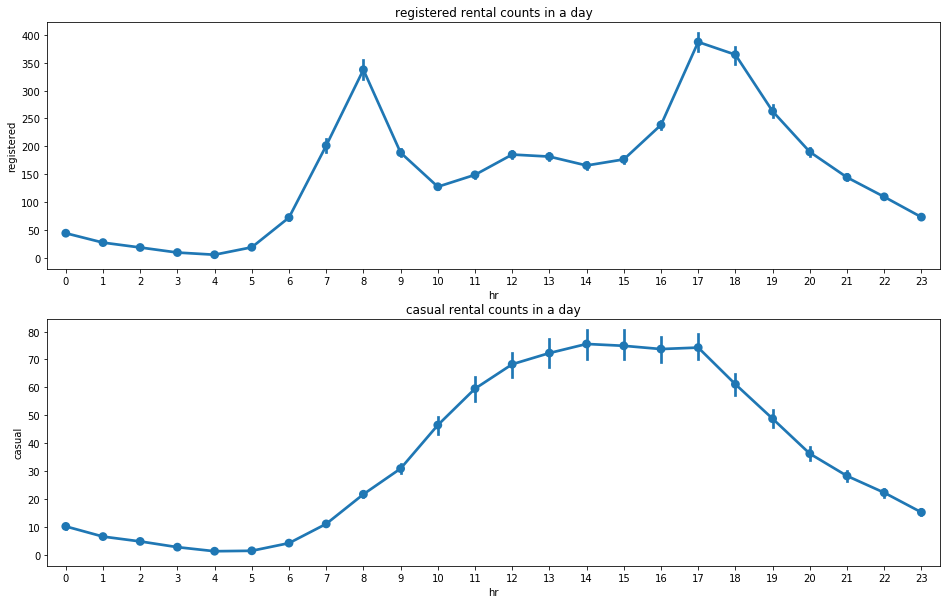

In [193]:
data_origin = pd.read_csv('dataset.csv')
axes = plt.subplots(2, 1, figsize = (16,10))
ax1 = plt.subplot(2, 1, 1)
sn.pointplot(data_origin['hr'], data_origin['registered'], ax=ax1)
ax1.set_title('registered rental counts in a day')
ax2 = plt.subplot(2, 1, 2)
sn.pointplot(data_origin['hr'], data_origin['casual'], ax=ax2)
ax2.set_title('casual rental counts in a day')
plt.savefig("registered or casual.jpg")